# **PROJECT AKHIR**
## Klasifikasi Batik Indonesia Berdasarkan Daerahnya

**Kelompok Cyborg Droids**

Nama anggota kelompok :

1.   Febrilyana Wulandari
2.   Fikri Gusna Wardana
3.   Intan Syafitri
4.   Siska Puspitasari
5.   Yollanda Azura



## Latar Belakang
Batik adalah hasil karya bangsa Indonesia yang merupakan perpaduan antara seni dan teknologi oleh leluhur bangsa Indonesia. Batik Indonesia dapat berkembang hingga sampai pada suatu tingkatan yang tak ada bandingannya baik dalam desain/motif maupun prosesnya. Corak ragam batik yang mengandung penuh makna dan filosofi akan terus digali dari berbagai adat istiadat maupun budaya yang berkembang  di Indonesia. 

Motif Batik menurut Kamus Besar Bahasa Indonesia, motif adalah corak atau pola. 
Motif batik adalah corak atau pola  yang menjadi kerangka gambar pada batik berupa perpaduan antara garis, bentuk dan isen menjadi satu kesatuan yang mewujudkan batik secara keseluruhan. Motif-motif batik itu antara lain adalah motif hewan, manusia, geometris, dan motif lain. Motif batik sering juga dipakai untuk menunjukkan status seseorang. Membatik merupakan tradisi turun-menurun. Karena itu, sering motif batik manjadi ciri khas dari batik yang diproduksi keluarga tertentu (Wikipedia, 2015).

Indonesia mempunyai beberapa motif yang terkait dengan budaya setempat. Beberapa faktor yang mempengaruhi lahirnya motif-motif batik antara lain adalah letak geografis, misalnya di daerah pesisir akan menghasilkan batik dengan motif yang berhubungan dengan laut, begitu pula dengan yang tinggal di pegunungan akan terinspirasi oleh alam sekitarnya, sifat dan tata penghidupan daerah, kepercayaan dan adat di suatu daerah, serta keadaan alam sekitar termasuk flora dan fauna.

Saat ini terdapat ratusan motif kain batik yang tersebar di Indonesia, memiliki nama dan makna tersendiri. Motif batik didasarkan pada bentuk dan pola lukisan yang tergambar. Banyaknya pola batik di Indonesia menyebabkan sulitnya untuk mengidentifikasi ragam motif batik, khususnya bagi masyarakat Indonesia maupun asing. Adanya suatu metode untuk mempermudah pengenalan pola batik tentu memiliki banyak manfaat. Salah satu metode yang bisa digunakan adalah melakukan klasifikasi gambar batik dengan memanfaatkan kecerdasan buatan. Metode klasifikasi yang akan dilakukan bisa digunakan untuk mengidentifikasi jenis motif batik. Dengan adanya ini, diharapkan masyarakat Indonesia maupun masyarakat asing akan mengetahui nama batik daerah dengan mudah.

## Tujuan
Membuat suatu mesin AI (Artificial Intelligence) untuk mengenali motif batik secara otomatis dan memperkenalkan berbagai macam motif batik ke masyarakat Indonesia dan turis mancanegara

## 1. Problem Scoping

1. Who 
 - Masyarakat Indonesia dan orang asing yang ingin mengenal motif batik buatan Indonesia

2. What 
 - Banyaknya pola/motif batik di Indonesia menyebabkan sulitnya untuk mengidentifikasi ragam motif batik
 - Kurangnya pengetahuan masyarakat Indonesia pada zaman ini mengenai batik Indonesia dan kebanyakan beberapa masyarakat tidak tahu mengenai perbedaan dari motif-motif batik dari masing-masing daerah di Indonesia

3. Where
 - Seluruh Dunia khususnya Indonesia

4. Why 
 - Memberikan kemudahan kepada masyarakat Indonesia dan orang asing untuk mengenali motif-motif batik daerah di Indonesia

## 2. Data Acquisition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
#menentukan direktori training dan testing
train_dir = '/content/drive/MyDrive/Dataset/Data-batik/Train'
validation_dir = '/content/drive/MyDrive/Dataset/Data-batik/Test'
#dataset
parang_dir = '/content/drive/MyDrive/Dataset/Data-batik/Batik Indonesia/batik-parang'
megamendung_dir = '/content/drive/MyDrive/Dataset/Data-batik/Batik Indonesia/batik-megamendung'
kawung_dir = '/content/drive/MyDrive/Dataset/Data-batik/Batik Indonesia/batik-kawung'
truntum_dir = '/content/drive/MyDrive/Dataset/Data-batik/Batik Indonesia/batik-truntum'

#train dataset
train_batikparang_dir = os.path.join(train_dir, 'batikParang/')
train_batikmegamendung_dir = os.path.join(train_dir, 'batikMegamendung/')
train_batikkawung_dir = os.path.join(train_dir, 'batikKawung/')
train_batiktruntum_dir = os.path.join(train_dir, 'batikTruntum/')

#validation dataset
validation_batikparang_dir = os.path.join(validation_dir, 'batikParang/')
validation_batikmegamendung_dir = os.path.join(validation_dir, 'batikMegamendung/')
validation_batikkawung_dir = os.path.join(validation_dir, 'batikKawung/')
validation_batiktruntum_dir = os.path.join(validation_dir, 'batikTruntum/')

Dataset yang kami gunakan belum tersedia data Training dan data Testing nya, jadi dilakukan pembagian data training dan data testing yang datanya diambil dari Data Batik.

In [ ]:
#membagi data batik kedalam data train dan data test secara random
import random 
from shutil import copyfile

def train_test_split(source, train, test, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  test_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  test_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in test_files:
    i_file = source + i
    destination = test + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.8 #data train 80% data test 20%

#pembagian training dan testing
source_01 = parang_dir
train_01 = train_batikparang_dir
test_01 = validation_batikparang_dir
train_test_split(source_01, train_01, test_01, train_ratio)

source_02 = megamendung_dir
train_02 = train_batikmegamendung_dir
test_02 = validation_batikmegamendung_dir
train_test_split(source_02, train_02, test_02, train_ratio)

source_03 = kawung_dir
train_03 = train_batikkawung_dir
test_03 = validation_batikkawung_dir
train_test_split(source_03, train_03, test_03, train_ratio)

source_04 = truntum_dir
train_04 = train_batiktruntum_dir
test_04 = validation_batiktruntum_dir
train_test_split(source_04, train_04, test_04, train_ratio)

In [ ]:
print('total data batik Parang :', len(os.listdir(parang_dir)))
print('total training batik Parang :', len(os.listdir(train_batikparang_dir)))
print('total testing batik Parang:', len(os.listdir(validation_batikparang_dir)))

print('total data batik Mega Mendung :', len(os.listdir(megamendung_dir)))
print('total training batik Mega Mendung:', len(os.listdir(train_batikmegamendung_dir)))
print('total testing batik Mega Mendung:', len(os.listdir(validation_batikmegamendung_dir)))

print('total data batik Kawung :', len(os.listdir(kawung_dir)))
print('total training batik Kawung :', len(os.listdir(train_batikkawung_dir)))
print('total testing batik Kawung:', len(os.listdir(validation_batikkawung_dir)))

print('total data batik Truntum :', len(os.listdir(truntum_dir)))
print('total training batik Truntum :', len(os.listdir(train_batiktruntum_dir)))
print('total testing batik Truntum:', len(os.listdir(validation_batiktruntum_dir)))

total data batik Parang : 200
total training batik Parang : 160
total testing batik Parang: 40
total data batik Mega Mendung : 200
total training batik Mega Mendung: 160
total testing batik Mega Mendung: 40
total data batik Kawung : 200
total training batik Kawung : 160
total testing batik Kawung: 40
total data batik Truntum : 200
total training batik Truntum : 160
total testing batik Truntum: 40


## 3. Data Exploration

### Import Library

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# AUGMENTASI GAMBAR
# semua gambar akan diskalakan ulang sebesar 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_batch = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Data-batik/Train' , # direktori data training
                                                classes=['batikParang', 'batikMegamendung', 'batikKawung', 'batikTruntum'],
                                                batch_size = 32, class_mode='categorical', target_size=(200, 200))

validation_batch = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Data-batik/Test', # direktori data testing
                                                classes=['batikParang', 'batikMegamendung', 'batikKawung', 'batikTruntum'], 
                                                batch_size= 32, class_mode='categorical', target_size=(200, 200))

Found 640 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


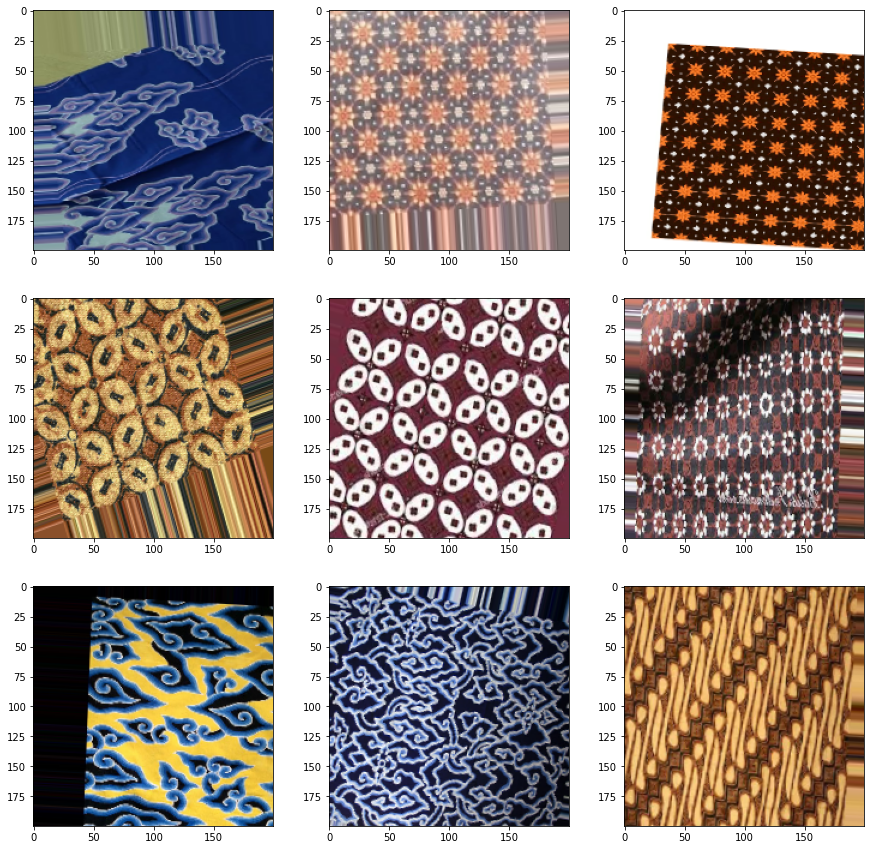

In [ ]:
# Memvisualisasikan beberapa contoh gambar batik sebelum Augmentasi
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = train_batch.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## 4. Modelling

Pre-Trained model menggunakan VGG16 yang bertujuan untuk mendapatkan nilai akurasi yang terbaik

In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(200, 200, 3), include_top=False, weights="imagenet")

Membuat Pre-Trained model layer untuk tahap modeling

In [ ]:
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)

In [ ]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.Model(pre_trained_model.input, x)

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
vgg_classifier = model.fit(train_batch, 
                          steps_per_epoch=20,
                          epochs = 50,
                          validation_data=validation_batch,
                          validation_steps=5,
                          verbose = 1)

Epoch 1/50
20/20 [==============================] - 12s 578ms/step - loss: 1.0236 - acc: 0.5844 - val_loss: 0.7389 - val_acc: 0.7437
Epoch 2/50
20/20 [==============================] - 12s 586ms/step - loss: 0.5663 - acc: 0.7984 - val_loss: 0.4503 - val_acc: 0.8562
Epoch 3/50
20/20 [==============================] - 12s 571ms/step - loss: 0.4223 - acc: 0.8641 - val_loss: 0.4241 - val_acc: 0.8625
Epoch 4/50
20/20 [==============================] - 11s 575ms/step - loss: 0.3977 - acc: 0.8609 - val_loss: 0.3410 - val_acc: 0.8687
Epoch 5/50
20/20 [==============================] - 11s 567ms/step - loss: 0.3598 - acc: 0.8906 - val_loss: 0.3455 - val_acc: 0.8625
Epoch 6/50
20/20 [==============================] - 11s 573ms/step - loss: 0.3143 - acc: 0.8828 - val_loss: 0.2960 - val_acc: 0.8813
Epoch 7/50
20/20 [==============================] - 11s 568ms/step - loss: 0.2892 - acc: 0.9062 - val_loss: 0.2957 - val_acc: 0.8938
Epoch 8/50
20/20 [==============================] - 11s 565ms/step - 

## 5. Evaluation

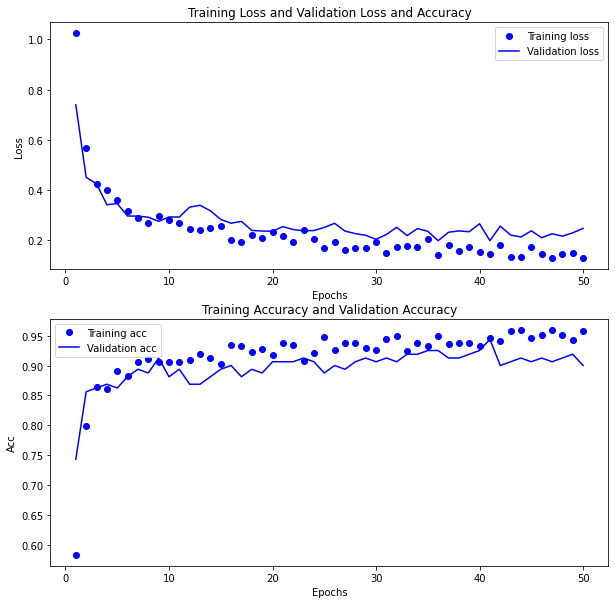

In [ ]:
# Kurva Training
#lr 0,0008 danse 128 bs 8
import matplotlib.pyplot as plt

history_dict = vgg_classifier.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training Loss and Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,1,2)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
test_loss = model.evaluate(validation_batch) 

5/5 [==============================] - 1s 266ms/step - loss: 0.2467 - acc: 0.9000


In [ ]:
model.save('/content/drive/MyDrive/Dataset/Model/modelbatik.h5') 

In [ ]:
import itertools

# Mencetak dan memplot the confusion matrix dan mengatur normalisasinya menjadi Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classes: ['batikParang', 'batikMegamendung', 'batikKawung', 'batikTruntum']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Classification Report
                  precision    recall  f1-score   support

     batikParang       0.26      0.25      0.26        40
batikMegamendung       0.20      0.23      0.21        40
     batikKawung       0.23      0.25      0.24        40
    batikTruntum       0.24      0.20      0.22        40

        accuracy                           0.23       160
       macro avg       0.23      0.23      0.23       160
    weighted avg       0.23      0.23      0.23       160



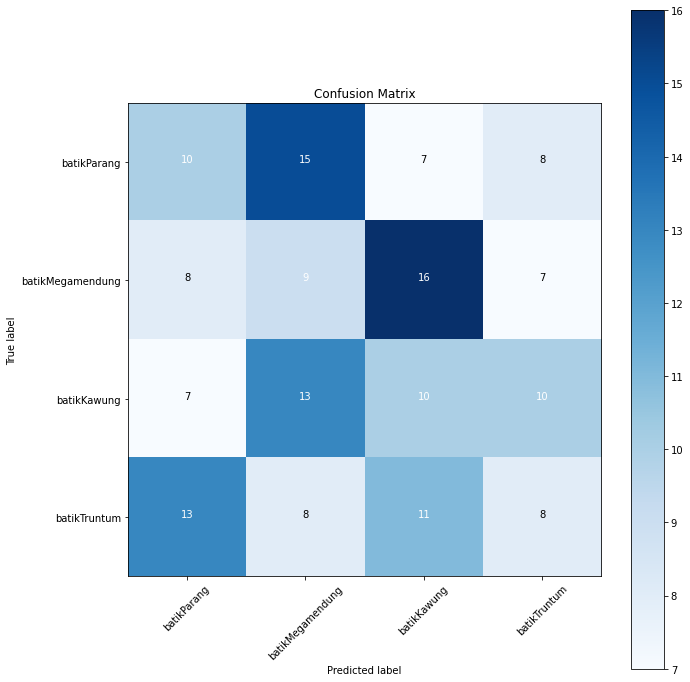

In [ ]:
# Laporan untuk hasil klasifikasi
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

classes = list(train_batch.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

# Dataset Test
Y_pred = model.predict_generator(validation_batch)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Confusion Matrix
cm = confusion_matrix(validation_batch.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(validation_batch.classes, y_pred, target_names=target_names))

Saving parang_68.jpg to parang_68.jpg
parang_68.jpg
This image belongs to class batikParang


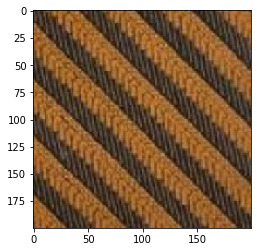

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_151.jpg to parang_151.jpg
parang_151.jpg
This image belongs to class batikParang


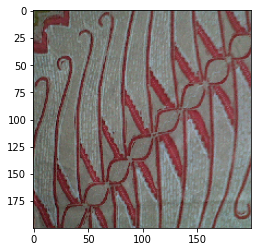

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_178.jpg to Mega_mendung_178.jpg
Mega_mendung_178.jpg
This image belongs to class batikMegamendung


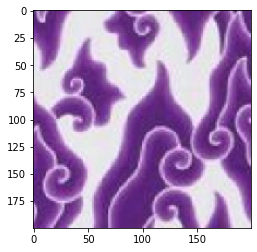

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_162.jpg to Mega_mendung_162.jpg
Mega_mendung_162.jpg
This image belongs to class batikMegamendung


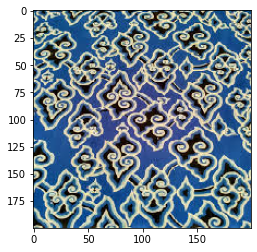

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Kawung_5.jpg to Kawung_5.jpg
Kawung_5.jpg
This image belongs to class batikKawung


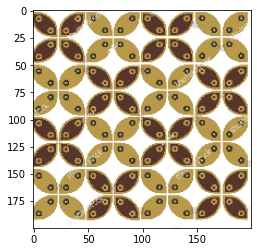

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving parang_86.jpg to parang_86.jpg
parang_86.jpg
This image belongs to class batikParang


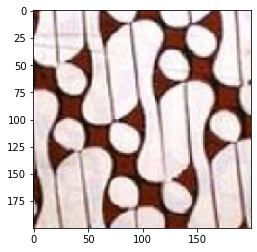

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_164.jpg to parang_164.jpg
parang_164.jpg
This image belongs to class batikParang


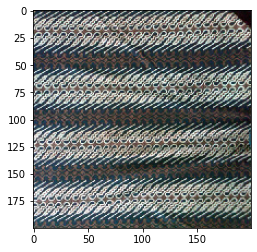

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Kawung_7.jpg to Kawung_7.jpg
Kawung_7.jpg
This image belongs to class batikKawung


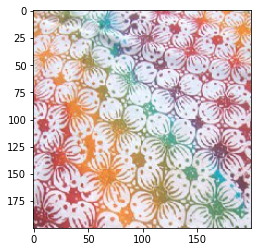

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Kawung_126.jpg to Kawung_126.jpg
Kawung_126.jpg
This image belongs to class batikParang


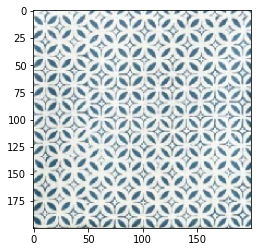

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Truntum_141.jpg to Truntum_141.jpg
Truntum_141.jpg
This image belongs to class batikTruntum


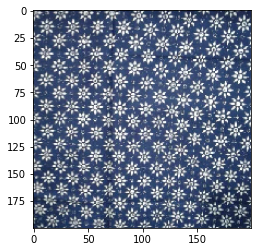

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 0 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Truntum_200.jpg to Truntum_200 (1).jpg
Truntum_200.jpg
This image belongs to class batikTruntum


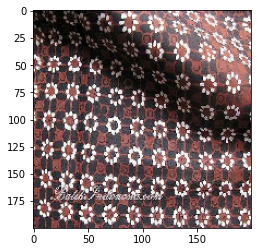

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 0 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Truntum_36.jpg to Truntum_36 (1).jpg
Truntum_36.jpg
This image belongs to class batikTruntum


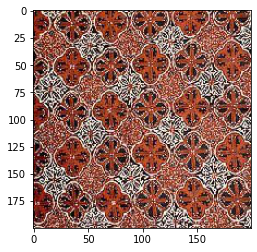

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 0 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Mega_mendung_11.jpg to Mega_mendung_11.jpg
Mega_mendung_11.jpg
This image belongs to class batikMegamendung


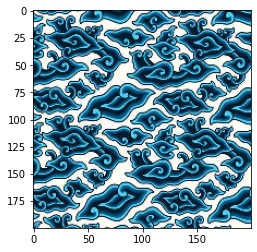

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Kawung_97.jpg to Kawung_97.jpg
Kawung_97.jpg
This image belongs to class batikKawung


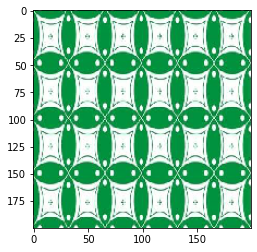

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Kawung_189.jpg to Kawung_189.jpg
Kawung_189.jpg
This image belongs to class batikKawung


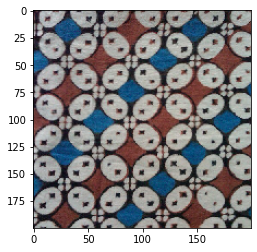

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving parang_98.jpg to parang_98.jpg
parang_98.jpg
This image belongs to class batikParang


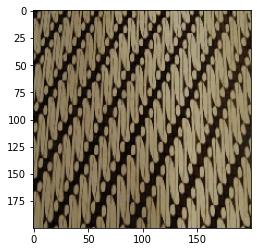

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(40):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving parang_19.jpg to parang_19.jpg
parang_19.jpg
This image belongs to class batikParang


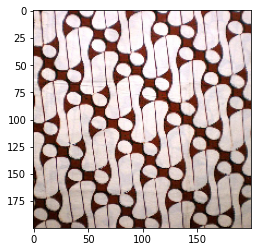

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving parang_155.jpg to parang_155.jpg
parang_155.jpg
This image belongs to class batikParang


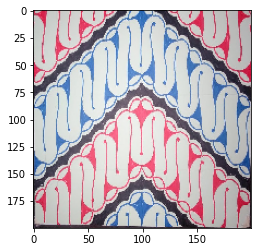

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Mega_mendung_24.jpg to Mega_mendung_24.jpg
Mega_mendung_24.jpg
This image belongs to class batikMegamendung


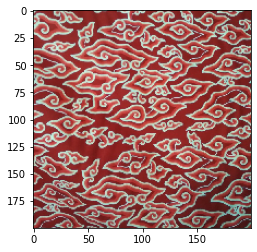

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_50.jpg to parang_50.jpg
parang_50.jpg
This image belongs to class batikParang


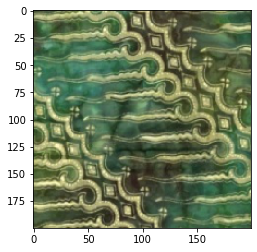

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving parang_19.jpg to parang_19 (2).jpg
parang_19.jpg
This image belongs to class batikParang


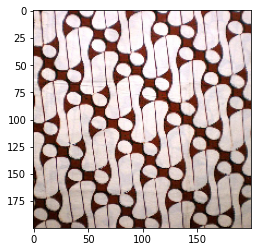

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 0 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_189.jpg to parang_189.jpg
parang_189.jpg
This image belongs to class batikParang


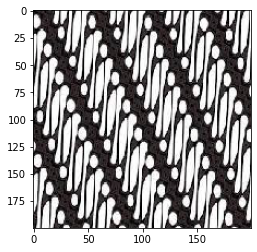

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_18.jpg to parang_18.jpg
parang_18.jpg
This image belongs to class batikParang


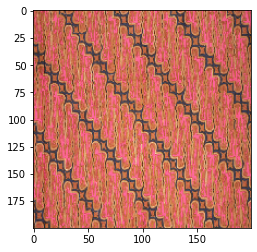

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Kawung_27.jpg to Kawung_27.jpg
Kawung_27.jpg
This image belongs to class batikKawung


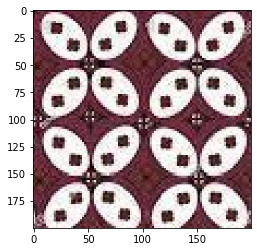

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j-1])
      break

Saving Mega_mendung_86.jpg to Mega_mendung_86 (1).jpg
Mega_mendung_86.jpg
This image belongs to class batikMegamendung


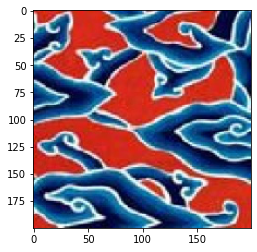

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_145.jpg to parang_145.jpg
parang_145.jpg
This image belongs to class batikParang


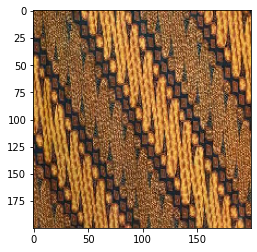

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_190.jpg to parang_190.jpg
parang_190.jpg
This image belongs to class batikParang


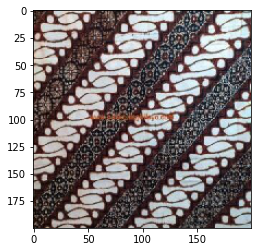

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_105.jpg to parang_105.jpg
parang_105.jpg
This image belongs to class batikParang


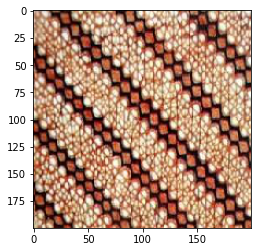

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving parang_191.jpg to parang_191.jpg
parang_191.jpg
This image belongs to class batikParang


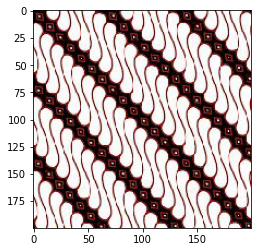

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Truntum_70.jpg to Truntum_70.jpg
Truntum_70.jpg
This image belongs to class batikTruntum


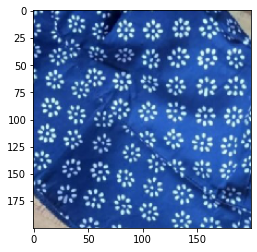

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_26.jpg to Mega_mendung_26 (1).jpg
Mega_mendung_26.jpg
This image belongs to class batikMegamendung


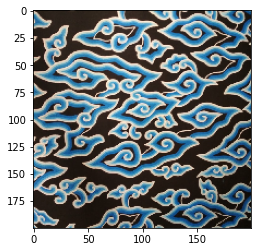

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1:
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_31.jpg to Mega_mendung_31.jpg
Mega_mendung_31.jpg
This image belongs to class batikMegamendung


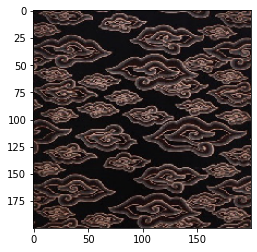

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_22.jpg to Mega_mendung_22 (1).jpg
Mega_mendung_22.jpg
This image belongs to class batikMegamendung


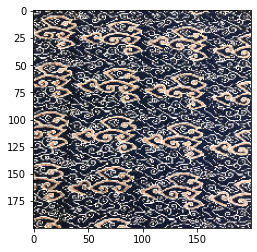

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_95.jpg to Mega_mendung_95.jpg
Mega_mendung_95.jpg
This image belongs to class batikMegamendung


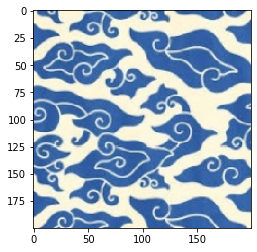

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_196.jpg to Mega_mendung_196.jpg
Mega_mendung_196.jpg
This image belongs to class batikMegamendung


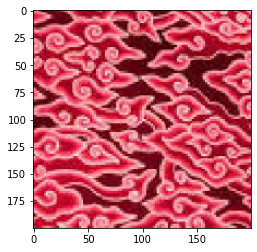

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break

Saving Mega_mendung_195.jpg to Mega_mendung_195.jpg
Mega_mendung_195.jpg
This image belongs to class batikMegamendung


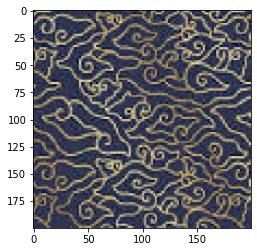

In [ ]:
from matplotlib import path
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)

  print(fn)

  class_list= os.listdir(train_dir)

  for j in range(160):
    if classes[0][j] == 1 :
      print('This image belongs to class', class_list[j+1])
      break